In [136]:
from skimage.morphology import label, closing, disk, remove_small_holes, remove_small_objects
from skimage.filters import threshold_otsu, sobel
from skimage.segmentation import expand_labels
from skimage.restoration import denoise_nl_means
from skimage import img_as_float32

import tifffile
import matplotlib.pyplot as plt
import numpy
import seaborn

In [74]:
paths = [
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/500_Ch1.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/500_Ch4.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/500_Ch6.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/500_Ch7.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/500_Ch11.ome.tif"
]

In [231]:
paths = [
    "/vsc-mounts/gent-user/420/vsc42015/vsc_data_vo/datasets/weizmann/EhV/v2/images/Ctrl_T1_R2/23265_Ch1.ome.tif",
    "/vsc-mounts/gent-user/420/vsc42015/vsc_data_vo/datasets/weizmann/EhV/v2/images/Ctrl_T1_R2/23265_Ch3.ome.tif",
    "/vsc-mounts/gent-user/420/vsc42015/vsc_data_vo/datasets/weizmann/EhV/v2/images/Ctrl_T1_R2/23265_Ch4.ome.tif",
]

In [232]:
pixels = tifffile.imread(paths)
pixels = img_as_float32(pixels)

TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER
TiffTag 266: 0 is not a valid TIFF.FILLORDER


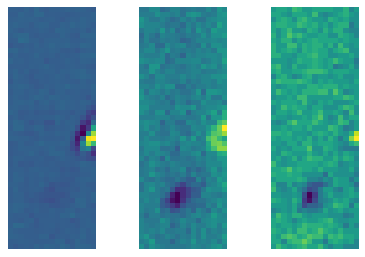

In [233]:
fig, axes = plt.subplots(1, len(pixels), dpi=80, squeeze=False)
axes = axes.ravel()
for p, ax in zip(pixels, axes):
    ax.imshow(p)
    ax.set_axis_off()

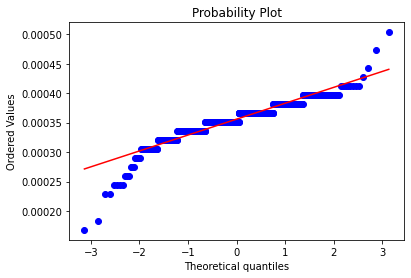

In [235]:
import scipy.stats as stats 
fig, ax = plt.subplots()
_ = stats.probplot(pixels[2].ravel(), dist="norm", plot=ax)

In [236]:
from scipy.stats import normaltest
normaltest(pixels[1].ravel())

NormaltestResult(statistic=162.84245961901843, pvalue=4.357216945402797e-36)

In [237]:
masked = numpy.empty_like(pixels)
for i in range(len(pixels)):
    x = pixels[i]
    
    x = sobel(x)
    x = closing(x, selem=disk(4))
    x = threshold_otsu(x) < x
    x = remove_small_holes(x, area_threshold=300)
    x = expand_labels(label(x), distance=1)
    x = remove_small_objects(x > 0, min_size=20)
    x = label(x)
    
    masked[i] = x

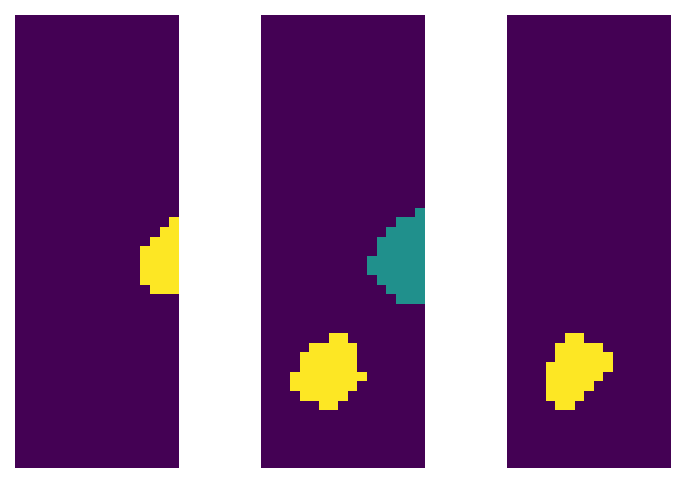

In [238]:
fig, axes = plt.subplots(1, len(pixels), dpi=150, squeeze=False)
axes = axes.ravel()
for p, ax in zip(masked, axes):
    ax.imshow(p)
    ax.set_axis_off()

In [246]:
from skimage.measure import regionprops
regionprops(label(masked[2]))[0].perimeter

20.727922061357855

In [249]:
numpy.any(masked[2])

True